In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

import cv2
from skimage.io import imread_collection
from skimage.filters import roberts, sobel, gaussian
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import watershed, disk
from skimage.filters import rank
from sklearn.decomposition import PCA
from pylab import *
import skimage
from skimage.filters import rank

DATA_DIR = 'table_images/*'

In [2]:
from skimage import draw
import numpy as np
def poly2mask(vertex_row_coords, vertex_col_coords, shape): # this is added in version 0.16.dev0
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=np.bool)
    mask[fill_row_coords, fill_col_coords] = True
    return mask

In [3]:
import pandas as pd

col = imread_collection(DATA_DIR, cv2.IMREAD_GRAYSCALE)[100:150]

df = pd.DataFrame()
col[0].shape

(1510, 1100)

In [4]:

rows_list = []

dataset = []

PREPROC_DIR = "./preproc2"
i = 100
#fig, ax = plt.subplots(int(len(col[:3])/2), 2)
for im in col:
    edgess_clean = sobel(im)
    contours = find_contours(edgess_clean, 0.45, fully_connected='high', positive_orientation='high')
    
    coordonates_x = []
    coordonates_y = []
    polygon = []
    fig = plt.figure(figsize=(64, 64))
    #fig.set_size_inches(width/height, 1, forward=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    for contour in contours:
        coords = approximate_polygon(contour, tolerance=39.5)
        ax.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
        #ax[i, j].plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
        #coordonates_x.append(coords[:, 0][0])
        #coordonates_y.append(coords[:, 1][1])    
        #polygon.append([coords[:, 0], coords[:, 1]])
    
    fig.add_axes(ax)
    plt.savefig(PREPROC_DIR + '/preproc_img_' + str(i), bbox_inches='tight', transparent=True, pad_inches=0)
    plt.close(fig)
    #coordonates_x = np.array(coordonates_x)
    #coordonates_y = np.array(coordonates_y)
    #mask = poly2mask(coordonates_x, coordonates_y, im.shape)
    #dataset.append(polygon)
    i += 1
    #ax.axis('image')
#plt.show()

In [ ]:
dataset

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[ 1.          0.72367065  0.2320026  -0.25429107 -0.55721991 -0.59913951
 -0.41280458 -0.10893327  0.17893551  0.34780448  0.35748852  0.23380958
  0.04690762 -0.12275601 -0.21591812 -0.21241248 -0.13137462 -0.01694367
  0.08259904  0.1333648   0.12567347  0.0731473   0.00339549 -0.05472957
 -0.08198104 -0.07402828 -0.04029719  0.00203856  0.03580865  0.05016511
  0.04340781  0.02192149 -0.00366666 -0.0231816  -0.03056191 -0.02533133
 -

<Figure size 432x288 with 0 Axes>

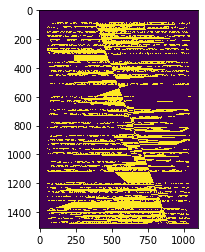

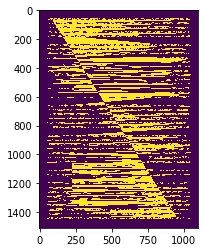

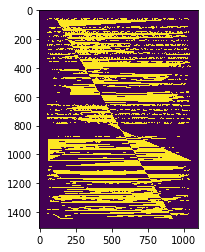

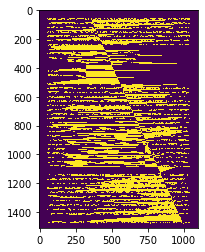

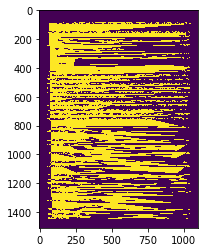

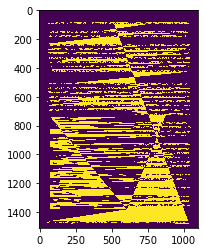

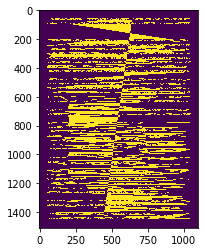

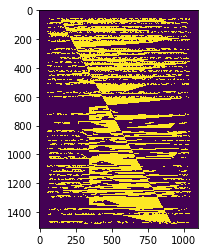

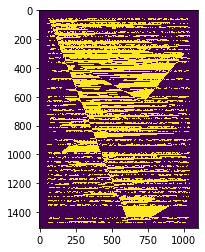

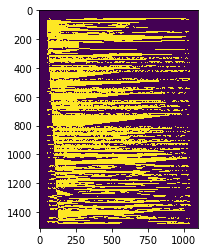

In [15]:
x1 = np.linspace(0.0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
print(x1)
print(y1)


i = 1
plt.figure()
#fig, ax = plt.subplots(ncols=len(dataset))
for data in dataset:
    plt.figure()
    plt.imshow(data)
    i+=1
plt.show()